AdaBoost算法既能做分类分析，也能做回归分析，

对应的模型分别为
- AdaBoost分类模型（AdaBoostClassifier），弱学习器是分类决策树模型
- AdaBoost回归模型（AdaBoostRegressor），弱学习器则是回归决策树模型。

# 简单示例

In [1]:
# 分类任务
from sklearn.ensemble import AdaBoostClassifier
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
y = [0, 0, 0, 1, 1]
model=AdaBoostClassifier(random_state=123)# random_state 无特殊意义，使得每次运行结果保持一致
model.fit(X,y)
model.predict([[5,5]])

array([0])

In [2]:
# 回归任务
from sklearn.ensemble import AdaBoostRegressor
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
y = [1, 2, 3, 4, 5]
model=AdaBoostRegressor(random_state=123)
model.fit(X,y)
model.predict([[5,5]])

array([3.])

# 信用卡精准营销案例

## 案例背景

各大商业银行纷纷投入更多资源拓展信用卡业务，信用卡产业飞速发展。因为市场竞争激烈，信用卡产品同质化严重，商业银行迫切需要采用更快捷有效的方式扩大客户规模，实现精准营销，从而降低成本，提高效益，增强自身竞争力

In [1]:
import pandas as pd
df=pd.read_excel('./data/信用卡精准营销模型.xlsx')
df.head()

,年龄,月收入（元）,月消费（元）,性别,月消费/月收入,响应
0,30,7275,6062,0,0.833265,1
1,25,17739,13648,0,0.769378,1
2,29,25736,14311,0,0.556069,1
3,23,14162,7596,0,0.536365,1
4,27,15563,12849,0,0.825612,1


accuracy_score:0.85



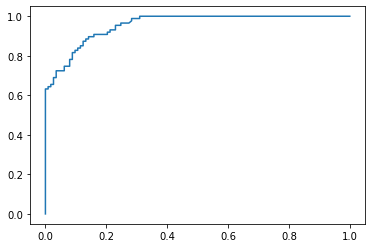

auc:0.9559047909673483



,特征名称,特征重要性
2,月消费（元）,0.36
4,月消费/月收入,0.24
1,月收入（元）,0.20
0,年龄,0.18
3,性别,0.02


In [6]:
X=df.drop(columns='响应')
y=df['响应']
# 划分数据样本
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)
# 训练预测模型
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(random_state=123)
model.fit(X_train,y_train)
# 模型预测
y_pred=model.predict(X_test)
y_pred_proba=model.predict_proba(X_test)
# 模型评估
# 精确度
from sklearn.metrics import accuracy_score
print('accuracy_score:{}\n'.format(accuracy_score(y_test,y_pred)))
# roc 曲线
from sklearn.metrics import roc_curve
fpr,tpr,thres=roc_curve(y_test,y_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.show()
# 计算 auc
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_pred_proba[:,1])
print('auc:{}\n'.format(score))
# 计算特征的重要性
features=X.columns
importances=model.feature_importances_
importances_df=pd.DataFrame()
importances_df['特征名称']=features
importances_df['特征重要性']=importances
importances_df.sort_values('特征重要性',ascending=False)